In [1]:
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [3]:
def metrics_fold(a, nb_images_test=600):
    
    ####### Accuracy
    acc = (a[0,0] + a[1,1] + a[2,2])/nb_images_test
    accuracy = acc*100
 
    ######## Sensibility (Recall)
    s = 0.0
    for i in range(3):
        s = s + (a[i,i]/(a[i,0] + a[i,1] + a[i,2]))
    sensibility = s*100/3

     ######## Specificity  
    spc = (a[1,1] + a[1,2] + a[2,1] + a[2,2])/(a[1,1] + a[1,2] + a[2,1] + a[2,2] + a[1,0] + a[2,0])
    spn = (a[0,0] + a[0,2] + a[2,0] + a[2,2])/(a[0,0] + a[0,2] + a[2,0] + a[2,2] + a[0,1] + a[2,1])
    spp = (a[0,0] + a[0,1] + a[1,0] + a[1,1])/(a[0,0] + a[0,1] + a[1,0] + a[1,1] + a[0,2] + a[1,2]) 
    specificity = 100*(spc+spn+spp)/3

    ######## Precision
    p = 0.0
    for i in range(3):
         p = p + (a[i,i]/(a[0,i] + a[1,i] + a[2,i]))
    precision = p*100/3
   
    ######## f1-score
    f1_score = (2*sensibility*precision)/(sensibility + precision)
    
  
    return np.array([sensibility, specificity, precision, f1_score, accuracy])

In [4]:
######## InceptionV3 plus Itao ############
######## Cross-Validation #################

mat1 = np.array([[197,2,1],[0,200,0],[0,0,200]])
mat2 = np.array([[199,0,1],[1,199,0],[0,0,200]])
mat3 = np.array([[197,0,3],[2,198,0],[0,0,200]])
mat4 = np.array([[197,2,1],[0,200,0],[0,0,200]])
mat5 = np.array([[198,2,0],[0,200,0],[0,0,200]])

res1 = metrics_fold(mat1)
res2 = metrics_fold(mat2)
res3 = metrics_fold(mat3)
res4 = metrics_fold(mat4)
res5 = metrics_fold(mat5)
print("fold1: ", res1)
print("fold2: ", res2)
print("fold3: ", res3)
print("fold4: ", res4)
print("fold5: ", res5)
print("Average: ", (res1 + res2 + res3 + res4 + res5)/5)

fold1:  [99.5        99.75       99.50412952 99.50206472 99.5       ]
fold2:  [99.66666667 99.83333333 99.66749585 99.66708126 99.66666667]
fold3:  [99.16666667 99.58333333 99.17238079 99.16952364 99.16666667]
fold4:  [99.5        99.75       99.50412952 99.50206472 99.5       ]
fold5:  [99.66666667 99.83333333 99.669967   99.6683168  99.66666667]
Average:  [99.5        99.75       99.50362053 99.50181023 99.5       ]


In [6]:
############ InceptionV3 plus SVM - SGD ###################
############ Cross-Validation #############################
mat1 = np.array([[183,15,2],[8,192,0],[0,0,200]])
mat2 = np.array([[184,16,0],[20,179,1],[1,0,199]])
mat3 = np.array([[186,12,2],[20,180,0],[2,0,198]])
mat4 = np.array([[181,18,1],[12,187,1],[1,0,199]])
mat5 = np.array([[175,25,0],[8,192,0],[0,0,200]])

res1 = metrics_fold(mat1)
res2 = metrics_fold(mat2)
res3 = metrics_fold(mat3)
res4 = metrics_fold(mat4)
res5 = metrics_fold(mat5)
print("fold1: ", res1)
print("fold2: ", res2)
print("fold3: ", res3)
print("fold4: ", res4)
print("fold5: ", res5)
print("Average: ", (res1 + res2 + res3 + res4 + res5)/5)

fold1:  [95.83333333 97.91666667 95.8583475  95.84583879 95.83333333]
fold2:  [93.66666667 96.83333333 93.68365645 93.67516079 93.66666667]
fold3:  [94.         97.         94.05769231 94.0288373  94.        ]
fold4:  [94.5        97.25       94.5078188  94.50390924 94.5       ]
fold5:  [94.5        97.25       94.70255932 94.60117123 94.5       ]
Average:  [94.5        97.25       94.56201488 94.53098347 94.5       ]


In [8]:
def results_model(confusion_matrices, nb_folds=5, nb_images_test=600):

    res = 0.0
    for i in range(nb_folds):
          res = res + metrics_fold(confusion_matrices[i], nb_images_test)

    return res/nb_folds

In [9]:
mat_InceptionV3_Itao = np.array([[[197,2,1],[0,200,0],[0,0,200]], [[199,0,1],[1,199,0],[0,0,200]], 
                            [[197,0,3],[2,198,0],[0,0,200]], [[197,2,1],[0,200,0],[0,0,200]],
                            [[198,2,0],[0,200,0],[0,0,200]]]) 

mat_ResNet50V2_Itao = np.array([[[198,2,0],[0,200,0],[0,0,200]], [[200,0,0],[2,198,0],[1,0,199]], 
                            [[194,4,2],[1,199,0],[0,0,200]], [[195,5,0],[3,197,0],[0,0,200]],
                            [[195,5,0],[1,199,0],[0,0,200]]]) 

mat_MobileNetV2_Itao = np.array([[[199,1,0],[2,198,0],[0,0,200]], [[195,5,0],[1,199,0],[1,0,199]], 
                            [[196,3,1],[2,198,0],[0,0,200]], [[200,0,0],[2,198,0],[0,0,200]],
                            [[195,5,0],[2,198,0],[0,0,200]]]) 

mat_DenseNet121_Itao = np.array([[[192,7,1],[7,193,0],[0,0,200]], [[195,5,0],[1,199,0],[0,0,200]], 
                            [[195,4,1],[2,198,0],[0,0,200]], [[196,4,0],[5,195,0],[0,0,200]],
                            [[191,8,1],[1,199,0],[0,0,200]]]) 

mat_VGG16_Itao = np.array([[[198,2,0],[0,200,0],[0,0,200]], [[197,2,1],[2,198,0],[1,0,199]], 
                            [[193,5,2],[4,196,0],[0,0,200]], [[194,6,0],[4,196,0],[0,0,200]],
                            [[192,6,2],[1,199,0],[0,0,200]]]) 
        
print("Average InceptionV3 + Itao: ", results_model(mat_InceptionV3_Itao))
print("Average ResNet50V2 + Itao: ", results_model(mat_ResNet50V2_Itao))
print("Average MpbileNet2 + Itao: ", results_model(mat_MobileNetV2_Itao))
print("Average DenseNet121 + Itao: ", results_model(mat_DenseNet121_Itao))
print("Average VGG16 + Itao: ", results_model(mat_VGG16_Itao))

Average InceptionV3 + Itao:  [99.5        99.75       99.50362053 99.50181023 99.5       ]
Average ResNet50V2 + Itao:  [99.13333333 99.56666667 99.14047481 99.13690391 99.13333333]
Average MpbileNet2 + Itao:  [99.16666667 99.58333333 99.17118142 99.16892395 99.16666667]
Average DenseNet121 + Itao:  [98.43333333 99.21666667 98.44333892 98.43833525 98.43333333]
Average VGG16 + Itao:  [98.73333333 99.36666667 98.73841473 98.73587378 98.73333333]


In [10]:
mat_InceptionV3_Itao = np.array([[[197,2,1],[0,200,0],[0,0,200]], [[199,0,1],[1,199,0],[0,0,200]], 
                            [[197,0,3],[2,198,0],[0,0,200]], [[197,2,1],[0,200,0],[0,0,200]],
                            [[198,2,0],[0,200,0],[0,0,200]]]) 

mat_InceptionV3_RMSprop = np.array([[[199,1,0],[0,200,0],[0,0,200]], [[200,0,0],[1,199,0],[0,0,200]], 
                            [[192,7,1],[0,200,0],[0,0,200]], [[197,3,0],[1,199,0],[0,0,200]],
                            [[197,2,1],[1,199,0],[0,0,200]]]) 

mat_InceptionV3_Adam = np.array([[[198,1,1],[0,200,0],[0,0,200]], [[200,0,0],[2,198,0],[0,0,200]], 
                            [[195,4,1],[2,198,0],[0,0,200]], [[196,3,1],[0,200,0],[0,0,200]],
                            [[196,4,0],[0,200,0],[0,0,200]]]) 

mat_InceptionV3_SGD = np.array([[[196,4,0],[1,199,0],[0,0,200]], [[197,3,0],[2,198,0],[1,0,199]], 
                            [[194,5,1],[15,185,0],[0,0,200]], [[193,6,1],[2,198,0],[0,0,200]],
                            [[196,4,0],[3,197,0],[0,0,200]]]) 

print("Average InceptionV3 + Itao: ", results_model(mat_InceptionV3_Itao))
print("Average InceptionV3 + RMSprop: ", results_model(mat_InceptionV3_RMSprop))
print("Average InceptionV3 + Adam: ", results_model(mat_InceptionV3_Adam))
print("Average InceptionV3 + SGD: ", results_model(mat_InceptionV3_SGD))

Average InceptionV3 + Itao:  [99.5        99.75       99.50362053 99.50181023 99.5       ]
Average InceptionV3 + RMSprop:  [99.4        99.7        99.40920222 99.40460028 99.4       ]
Average InceptionV3 + Adam:  [99.36666667 99.68333333 99.3723872  99.3695268  99.36666667]
Average InceptionV3 + SGD:  [98.4        99.2        98.41742419 98.40870983 98.4       ]


In [7]:
#################### Function metrics of one class versus the rest of classes #################

def metrics_class(nc, mats ):
    s=0
    sp=0
    pr=0
    for i in range(len(mats)):
        mat = mats[i]
        s = s + (mat[nc,nc]/(mat[nc,0] + mat[nc,1] + mat[nc,2]))
         
        pr = pr + (mat[nc,nc]/(mat[0,nc] + mat[1,nc] + mat[2,nc]))
        
        if nc == 0 :
            sp = sp + (mat[1,1] + mat[1,2] + mat[2,1] + mat[2,2])/(mat[1,1] + mat[1,2] + mat[2,1] + mat[2,2] + mat[1,0] + mat[2,0])
        elif nc== 1 :
            sp = sp + (mat[0,0] + mat[0,2] + mat[2,0] + mat[2,2])/(mat[0,0] + mat[0,2] + mat[2,0] + mat[2,2] + mat[0,1] + mat[2,1])
        else:
            sp = sp + (mat[0,0] + mat[0,1] + mat[1,0] + mat[1,1])/(mat[0,0] + mat[0,1] + mat[1,0] + mat[1,1] + mat[0,2] + mat[1,2]) 
    
    sensibility = s*100/5
    specificity = sp*100/5
    precision = pr*100/5
    f1_score = 2*sensibility*precision/(sensibility+precision)
    
    return np.array([sensibility,specificity,precision,f1_score])

In [13]:
# Example: Model InceptionV3, Itao
print("Class covid: ", metrics_class(0, mat_InceptionV3_Itao)) 
print("Class normal: ", metrics_class(1, mat_InceptionV3_Itao)) 
print("Class pneumonia: ", metrics_class(2, mat_InceptionV3_Itao)) 

Class covid:  [98.8        99.85       99.69899497 99.24746173]
Class normal:  [99.7        99.7        99.40594059 99.55275315]
Class pneumonia:  [100.          99.7         99.40592603  99.70207808]


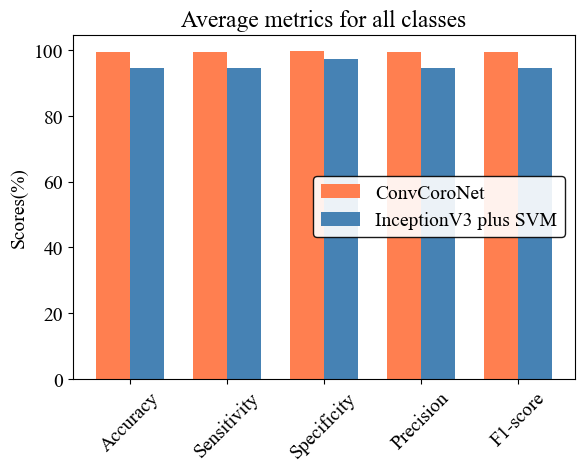

In [14]:
# Comparison of differnt metrics for model based on InceptionV3 and trained with Itao
# and the model based on inceptionV3 and SVM as classifier (trained with scheduled SVG) 
# Average metrics for all classes

font = {
          'family':'Times New Roman',
          'size':14
          }

matplotlib.rc('font', **font)
labels = ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1-score']
inception_itao = [99.50, 99.50, 99.75, 99.50, 99.50]
inception_svm = [94.50, 94.50 , 97.25 , 94.56  ,94.53  ]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, inception_itao, width, color='coral', label='ConvCoroNet')
rects2 = ax.bar(x + width/2, inception_svm, width, color='steelblue',label='InceptionV3 plus SVM')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores(%)')
ax.set_title('Average metrics for all classes')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
#ax.legend()
ax.legend( loc='center right',edgecolor="black", framealpha=0.9)
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()
fig.set_figheight(5)
fig.set_figwidth(6)

plt.show()

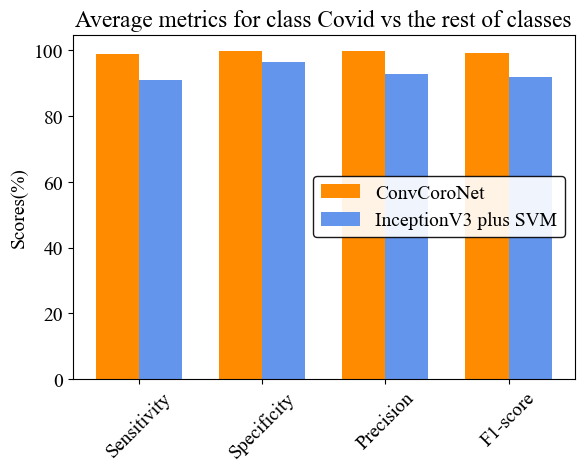

In [15]:
# Comparison of differnt metrics for model based on InceptionV3 and trained with Itao
# and the model based on inceptionV3 and SVM as classifier (trained with scheduled SVG) 
# for covid class versus the rest of classes

font = {
          'family':'Times New Roman',
          'size':14
          }

matplotlib.rc('font', **font)
labels = [ 'Sensitivity', 'Specificity', 'Precision', 'F1-score']
inception_itao_covid = [98.80, 99.85, 99.70, 99.25]
inception_svm_covid = [90.90  , 96.40 , 92.78 , 91.83]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, inception_itao_covid, width, color = 'darkorange', label='ConvCoroNet')
rects2 = ax.bar(x + width/2, inception_svm_covid, width, color = 'cornflowerblue', label='InceptionV3 plus SVM')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores(%)' )
ax.set_title('Average metrics for class Covid vs the rest of classes')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend( loc='center right', edgecolor="black", framealpha=0.9) #bbox_to_anchor=(1, 1),


fig.tight_layout()
fig.set_figheight(5)
fig.set_figwidth(6)

plt.show()